## **EDA**

In [35]:
# STEP 1 - Load the packages
!pip install dmba
!pip install imbalanced-learn
!pip install mord

import pandas as pd
import numpy as np
from numpy import mean

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier

import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, gainsChart, liftChart
import statsmodels.formula.api as sm
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from collections import Counter
from mord import LogisticIT
from dmba.metric import AIC_score

%matplotlib inline
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Step 2 - Load the data
df = pd.read_csv("Application_Data.csv")

In [ ]:
# Step 3 - Data Structure
#How many rows and columns the data have?
df.shape

(25128, 21)

In [ ]:
#The names of the columns don't require changes
df.columns

Index(['Applicant_ID', 'Applicant_Gender', 'Owned_Car', 'Owned_Realty',
       'Total_Children', 'Total_Income', 'Income_Type', 'Education_Type',
       'Family_Status', 'Housing_Type', 'Owned_Mobile_Phone',
       'Owned_Work_Phone', 'Owned_Phone', 'Owned_Email', 'Job_Title',
       'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
       'Total_Bad_Debt', 'Total_Good_Debt', 'Status'],
      dtype='object')

In [ ]:
df.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


In [ ]:
df.tail()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1
25127,5150487,M,1,0,0,202500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Drivers ...,2,54,6,0,30,1


In [ ]:
#There are 6 variables Object and 15 integer 
df.dtypes

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
Status                   int64
dtype: object

In [4]:
#Label object variables as Category
df.Applicant_Gender = df.Applicant_Gender.astype("category")
df.Income_Type = df.Income_Type.astype("category")
df.Education_Type = df.Education_Type.astype("category")
df.Family_Status = df.Family_Status.astype("category")
df.Housing_Type = df.Housing_Type.astype("category")
df.Job_Title = df.Job_Title.astype("category")

df.dtypes

Applicant_ID               int64
Applicant_Gender        category
Owned_Car                  int64
Owned_Realty               int64
Total_Children             int64
Total_Income               int64
Income_Type             category
Education_Type          category
Family_Status           category
Housing_Type            category
Owned_Mobile_Phone         int64
Owned_Work_Phone           int64
Owned_Phone                int64
Owned_Email                int64
Job_Title               category
Total_Family_Members       int64
Applicant_Age              int64
Years_of_Working           int64
Total_Bad_Debt             int64
Total_Good_Debt            int64
Status                     int64
dtype: object

In [ ]:
# Step 4 - Data Quality
#Looking for duplicated IDs/Customers
df["Applicant_ID"].duplicated().sum()

0

In [ ]:
#Looking for missing values
df.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [ ]:
df.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

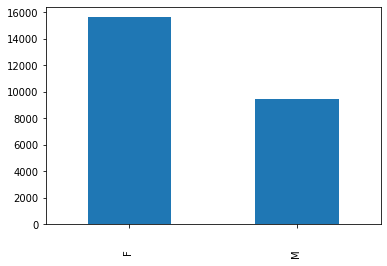

In [ ]:
#Histograms and Bar Charts to explore data. Looking for valid values, nothing out of theoretical range.
df["Applicant_Gender"].value_counts().plot(kind="bar")

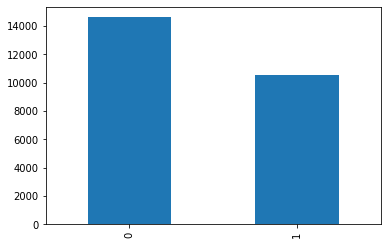

In [ ]:
df["Owned_Car"].value_counts().plot(kind="bar")

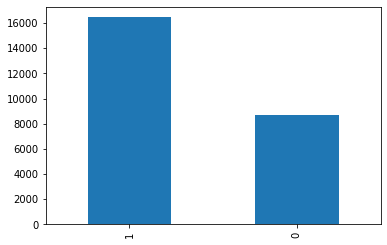

In [ ]:
df["Owned_Realty"].value_counts().plot(kind="bar")

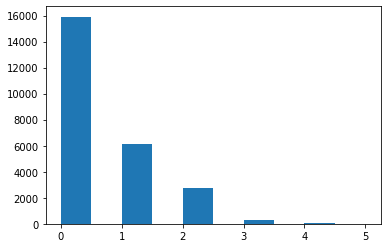

In [ ]:
fig, ax=plt.subplots()
ax.hist(df["Total_Children"])
plt.show()

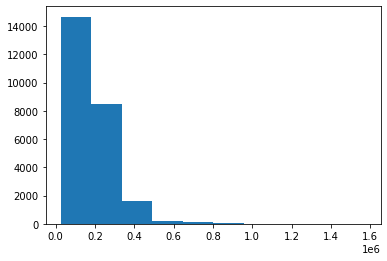

In [ ]:
fig, ax=plt.subplots()
ax.hist(df["Total_Income"])
plt.show()

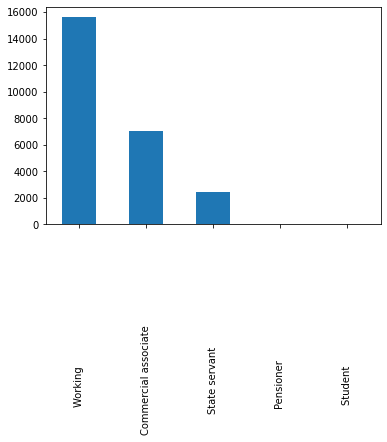

In [ ]:
df["Income_Type"].value_counts().plot(kind="bar")

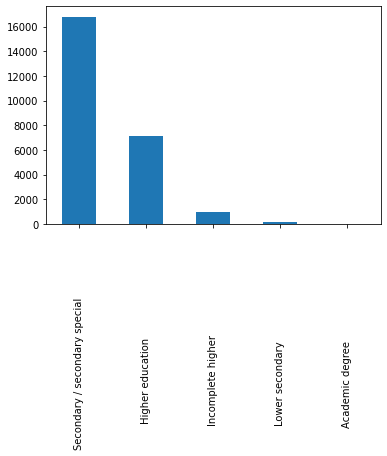

In [ ]:
df["Education_Type"].value_counts().plot(kind="bar")

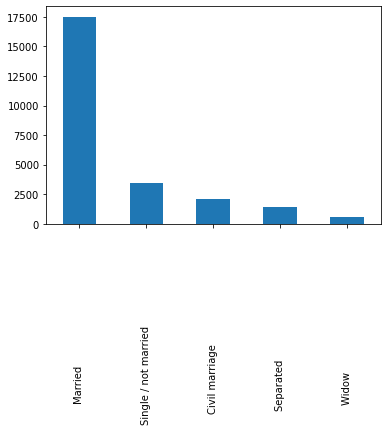

In [ ]:
df["Family_Status"].value_counts().plot(kind="bar")

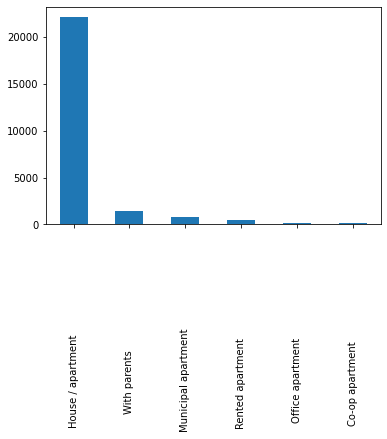

In [ ]:
df["Housing_Type"].value_counts().plot(kind="bar")

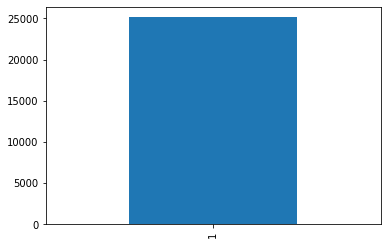

In [ ]:
df["Owned_Mobile_Phone"].value_counts().plot(kind="bar")

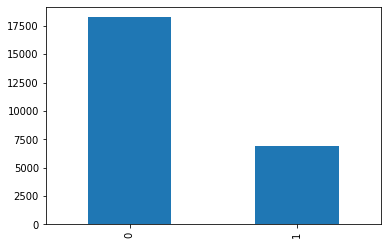

In [ ]:
df["Owned_Work_Phone"].value_counts().plot(kind="bar")

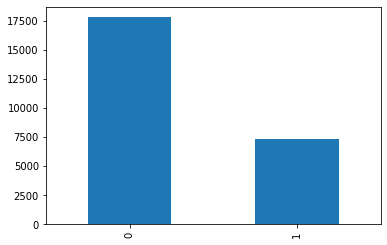

In [ ]:
df["Owned_Phone"].value_counts().plot(kind="bar")

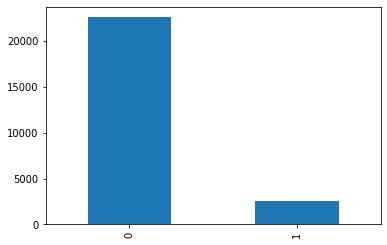

In [ ]:
df["Owned_Email"].value_counts().plot(kind="bar")

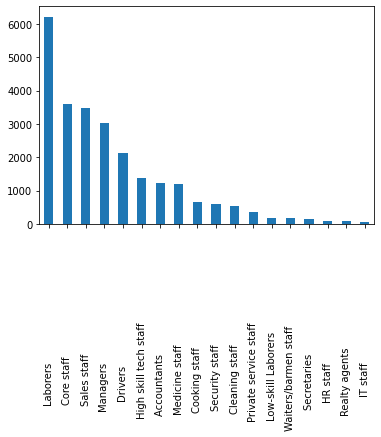

In [ ]:
df["Job_Title"].value_counts().plot(kind="bar")

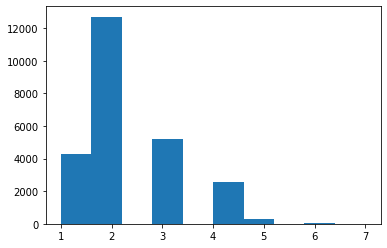

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["Total_Family_Members"])
plt.show()

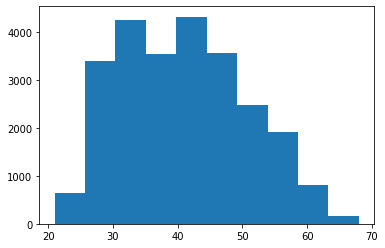

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["Applicant_Age"])
plt.show()

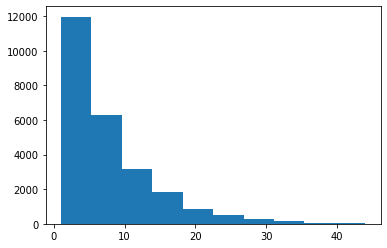

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["Years_of_Working"])
plt.show()

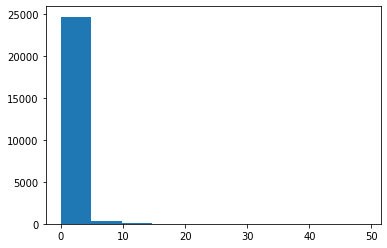

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["Total_Bad_Debt"])
plt.show()

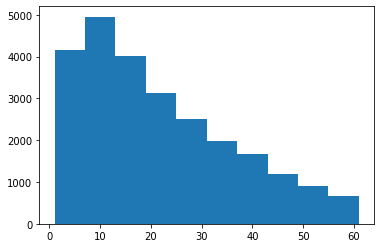

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["Total_Good_Debt"])
plt.show()

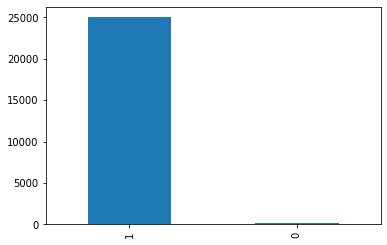

In [ ]:
# Unbalanced - Minority Vs. Majority

df["Status"].value_counts().plot(kind="bar")

In [ ]:
# Step 5 - Variable Properties
#Central tendency and variation.

df.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [ ]:
df.kurtosis(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Applicant_ID             -1.216681
Owned_Car                -1.890624
Owned_Realty             -1.575251
Total_Children            2.006112
Total_Income             20.451204
Owned_Mobile_Phone        0.000000
Owned_Work_Phone         -0.970146
Owned_Phone              -1.170098
Owned_Email               5.045215
Total_Family_Members      0.755748
Applicant_Age            -0.748897
Years_of_Working          3.580536
Total_Bad_Debt          250.217617
Total_Good_Debt          -0.351947
Status                  202.714833
dtype: float64

In [ ]:
df.skew(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Applicant_ID             0.055136
Owned_Car                0.330947
Owned_Realty            -0.651824
Total_Children           1.477275
Total_Income             2.964038
Owned_Mobile_Phone       0.000000
Owned_Work_Phone         1.014855
Owned_Phone              0.911041
Owned_Email              2.654207
Total_Family_Members     0.784489
Applicant_Age            0.271454
Years_of_Working         1.724235
Total_Bad_Debt          12.432799
Total_Good_Debt          0.738291
Status                 -14.307295
dtype: float64

In [ ]:
# Central tendency and variation with respect to target

df.groupby("Status").describe(include="all").unstack(1)

                         Status
Applicant_ID     count   0           121.0
                         1         25007.0
                 unique  0             NaN
                         1             NaN
                 top     0             NaN
                                    ...   
Total_Good_Debt  50%     1            18.0
                 75%     0             6.0
                         1            31.0
                 max     0            21.0
                         1            61.0
Length: 440, dtype: object

In [ ]:
df.groupby("Status").apply(pd.DataFrame.kurt).unstack(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/ops.py:852: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res = f(group)


                      Status
Applicant_ID          0          -1.282016
                      1          -1.216265
Owned_Car             0          -1.949922
                      1          -1.890473
Owned_Realty          0          -1.698781
                      1          -1.574706
Total_Children        0           0.509530
                      1           2.002217
Total_Income          0           8.515906
                      1          20.563285
Owned_Mobile_Phone    0           0.000000
                      1           0.000000
Owned_Work_Phone      0          -0.482914
                      1          -0.972033
Owned_Phone           0          -0.844515
                      1          -1.171420
Owned_Email           0           2.429528
                      1           5.064026
Total_Family_Members  0          -0.283788
                      1           0.755819
Applicant_Age         0          -1.171466
                      1          -0.746730
Years_of_Working      0  

In [ ]:
df.groupby("Status").skew(axis=0).unstack(1)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:937: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


                      Status
Applicant_ID          0        -0.086084
                      1         0.055833
Owned_Car             0         0.287382
                      1         0.331177
Owned_Realty          0        -0.574088
                      1        -0.652242
Total_Children        0         1.217644
                      1         1.476659
Total_Income          0         2.544564
                      1         2.966229
Owned_Mobile_Phone    0         0.000000
                      1         0.000000
Owned_Work_Phone      0         1.235048
                      1         1.013926
Owned_Phone           0         1.081537
                      1         0.910315
Owned_Email           0         2.095147
                      1         2.657747
Total_Family_Members  0         0.314645
                      1         0.785362
Applicant_Age         0         0.303241
                      1         0.271457
Years_of_Working      0         1.597805
                      1     

In [ ]:
# Correlation

corr = df[["Total_Children", "Total_Income", "Total_Family_Members", "Applicant_Age", "Years_of_Working", "Total_Bad_Debt", "Total_Good_Debt", "Status"]]

corr = corr.corr(method="pearson")
corr

,Total_Children,Total_Income,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Total_Children,1.000000,-0.015182,0.898460,-0.265141,-0.065068,-0.002668,-0.011748,0.011036
Total_Income,-0.015182,1.000000,-0.026003,0.057930,0.019723,0.015181,0.030039,-0.003482
Total_Family_Members,0.898460,-0.026003,1.000000,-0.217155,-0.047864,-0.004211,0.013526,0.010056
Applicant_Age,-0.265141,0.057930,-0.217155,1.000000,0.338013,-0.007301,0.090722,0.010078
Years_of_Working,-0.065068,0.019723,-0.047864,0.338013,1.000000,-0.017025,0.086426,0.021382
Total_Bad_Debt,-0.002668,0.015181,-0.004211,-0.007301,-0.017025,1.000000,0.024368,-0.458497
Total_Good_Debt,-0.011748,0.030039,0.013526,0.090722,0.086426,0.024368,1.000000,0.074516
Status,0.011036,-0.003482,0.010056,0.010078,0.021382,-0.458497,0.074516,1.000000


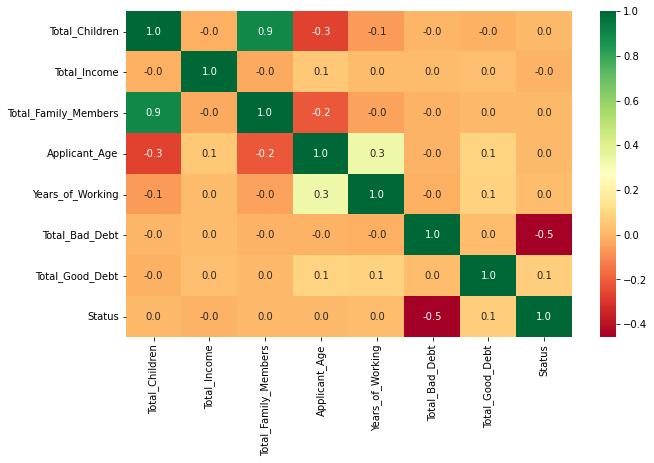

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(10,6)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 70.0)

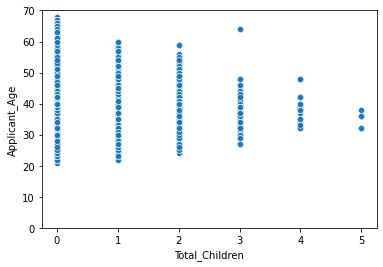

In [ ]:
#Bivariate

sns.scatterplot(df.Total_Children, df.Applicant_Age)
plt.ylim(0,70)

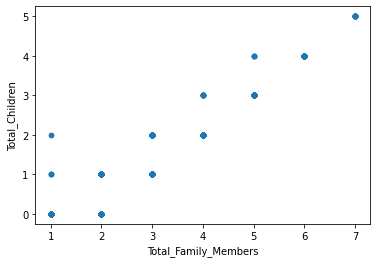

In [ ]:
df.plot.scatter("Total_Family_Members", "Total_Children")

In [ ]:
df.groupby(by="Status").agg("mean")[["Total_Children", "Total_Income", "Total_Family_Members", "Applicant_Age", "Years_of_Working", "Total_Bad_Debt", "Total_Good_Debt"]]

,Total_Children,Total_Income,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
Status,,,,,,,
0,0.388430,200068.595041,2.157025,39.611570,5.719008,10.677686,5.272727
1,0.510057,194811.182309,2.291958,41.002199,7.700444,0.283041,21.133923


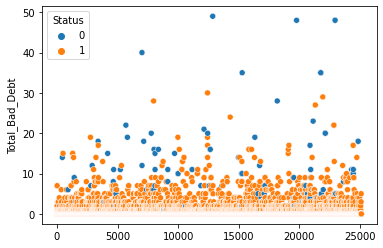

In [ ]:
sns.scatterplot(x=df.index, y=df["Total_Bad_Debt"], hue=df["Status"])

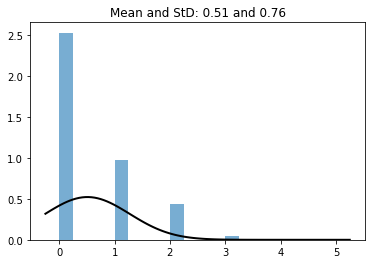

In [ ]:
# Distributions - Histograms
# Normal

mu, std = norm.fit(df["Total_Children"])

plt.hist(df["Total_Children"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

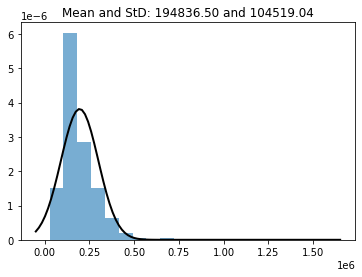

In [ ]:
mu, std = norm.fit(df["Total_Income"])

plt.hist(df["Total_Income"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

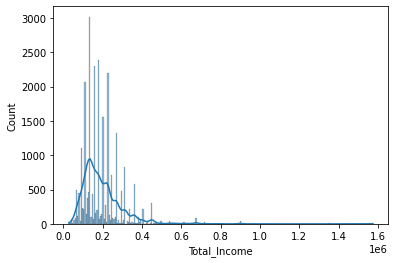

In [ ]:
sns.histplot(df.Total_Income,kde=True)

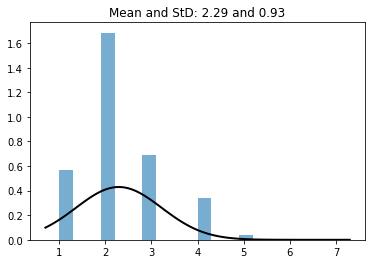

In [ ]:
mu, std = norm.fit(df["Total_Family_Members"])

plt.hist(df["Total_Family_Members"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

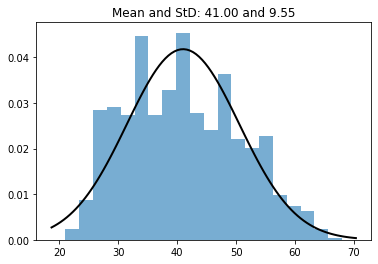

In [ ]:
mu, std = norm.fit(df["Applicant_Age"])

plt.hist(df["Applicant_Age"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

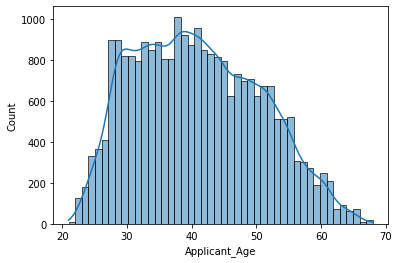

In [ ]:
sns.histplot(df.Applicant_Age,kde=True)

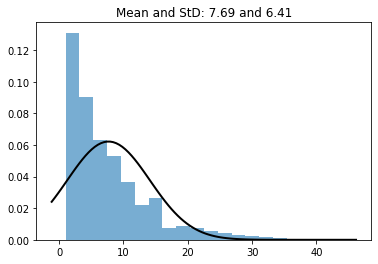

In [ ]:
mu, std = norm.fit(df["Years_of_Working"])

plt.hist(df["Years_of_Working"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

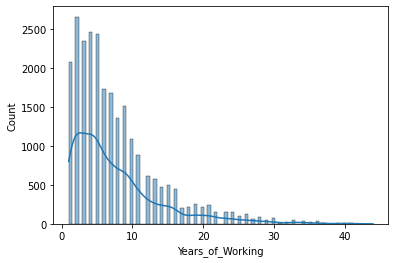

In [ ]:
sns.histplot(df.Years_of_Working,kde=True)

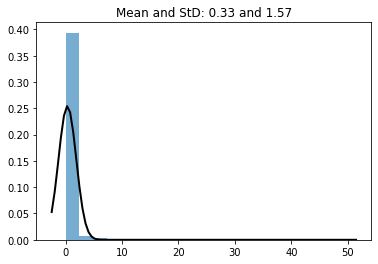

In [ ]:
mu, std = norm.fit(df["Total_Bad_Debt"])

plt.hist(df["Total_Bad_Debt"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

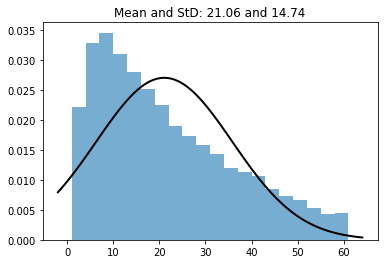

In [ ]:
mu, std = norm.fit(df["Total_Good_Debt"])

plt.hist(df["Total_Good_Debt"], bins=20, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)
title = "Mean and StD: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

plt.show()

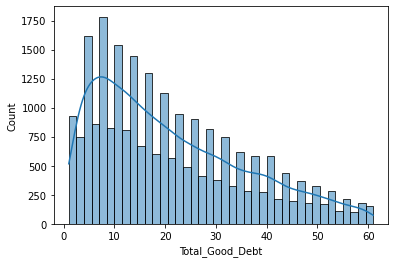

In [ ]:
sns.histplot(df.Total_Good_Debt,kde=True)

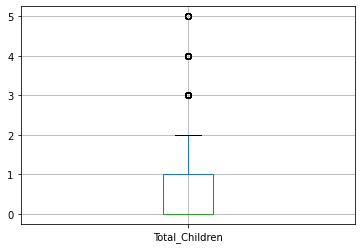

In [ ]:
# Outliers

df.boxplot(column="Total_Children")

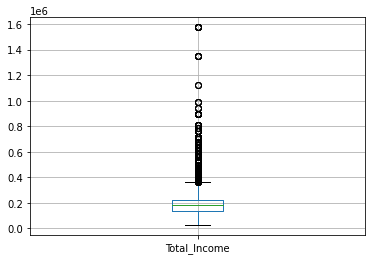

In [ ]:
df.boxplot(column="Total_Income")

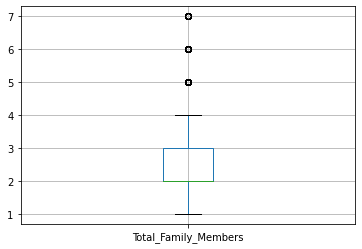

In [ ]:
df.boxplot(column="Total_Family_Members")

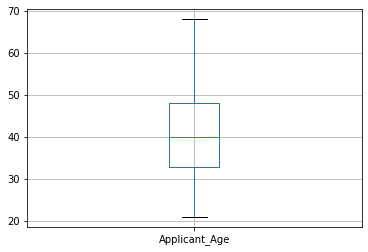

In [ ]:
df.boxplot(column="Applicant_Age")

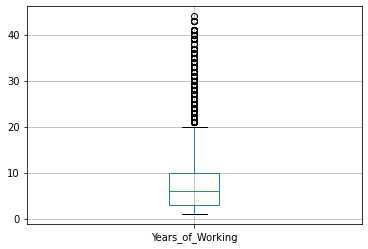

In [ ]:
df.boxplot(column="Years_of_Working")

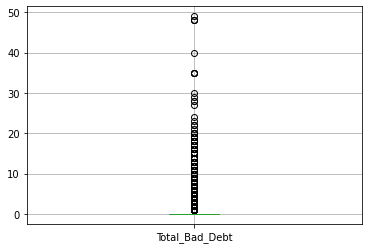

In [ ]:
df.boxplot(column="Total_Bad_Debt")

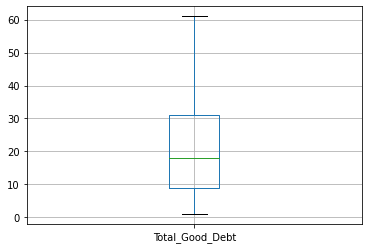

In [ ]:
df.boxplot(column="Total_Good_Debt")

In [ ]:
# Outliers +-3stdev

upper_limit = df.Total_Children.mean() + 3*df.Total_Children.std()
print(upper_limit)

lower_limit = df.Total_Children.mean() - 3*df.Total_Children.std()
print(lower_limit)

df[(df.Total_Children>upper_limit) | (df.Total_Children<lower_limit)]

2.7982825746207176
-1.7793395628410298


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
17,5008836,M,1,1,3,270000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,5,35,4,0,17,1
18,5008837,M,1,1,3,270000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,5,35,4,0,17,1
1476,5021500,M,1,1,4,292500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,6,39,2,0,24,1
1532,5021620,F,1,1,3,126000,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Managers ...,5,42,1,0,14,1
1533,5021622,F,1,1,3,126000,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Managers ...,5,42,1,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,5149690,F,1,1,3,405000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Accountants ...,5,39,11,0,23,1
24779,5149691,F,1,1,3,405000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Accountants ...,5,39,11,0,49,1
24985,5150032,F,1,1,3,112500,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,1,0,0,Cleaning staff ...,5,27,4,0,3,1
24986,5150033,F,1,1,3,112500,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,1,0,0,Cleaning staff ...,5,27,4,0,5,1


In [ ]:
upper_limit = df.Total_Income.mean() + 3*df.Total_Income.std()
print(upper_limit)

lower_limit = df.Total_Income.mean() - 3*df.Total_Income.std()
print(lower_limit)

df[(df.Total_Income>upper_limit) | (df.Total_Income<lower_limit)]

508399.8684659636
-118726.87133129308


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
198,5009092,M,1,1,1,765000,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,Managers ...,3,34,4,2,2,0
199,5009094,M,1,1,1,765000,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,Managers ...,3,34,4,0,4,1
200,5009095,M,1,1,1,765000,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,Managers ...,3,34,4,0,4,1
353,5009359,F,1,0,0,900000,Working ...,Higher education ...,Single / not married ...,House / apartment ...,...,0,0,0,Managers ...,1,53,21,6,10,1
354,5009360,F,1,0,0,900000,Working ...,Higher education ...,Single / not married ...,House / apartment ...,...,0,0,0,Managers ...,1,53,21,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24182,5148669,M,1,1,1,810000,Commercial associate ...,Incomplete higher ...,Civil marriage ...,Office apartment ...,...,0,0,0,Security staff ...,3,50,10,0,39,1
24183,5148671,M,1,1,1,810000,Commercial associate ...,Incomplete higher ...,Civil marriage ...,Office apartment ...,...,0,0,0,Security staff ...,3,50,10,0,9,1
24184,5148672,M,1,1,1,810000,Commercial associate ...,Incomplete higher ...,Civil marriage ...,Office apartment ...,...,0,0,0,Security staff ...,3,50,10,0,10,1
24363,5148987,F,1,1,1,540000,State servant ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,37,1,0,46,1


In [ ]:
upper_limit = df.Total_Family_Members.mean() + 3*df.Total_Family_Members.std()
print(upper_limit)

lower_limit = df.Total_Family_Members.mean() - 3*df.Total_Family_Members.std()
print(lower_limit)

df[(df.Total_Family_Members>upper_limit) | (df.Total_Family_Members<lower_limit)]

5.077922312888736
-0.49530531193362703


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
1476,5021500,M,1,1,4,292500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,6,39,2,0,24,1
3756,5028252,M,1,0,4,202500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,6,42,8,3,28,1
3757,5028253,M,1,0,4,202500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,6,42,8,0,15,1
3758,5028254,M,1,0,4,202500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,6,42,8,0,19,1
3759,5028255,M,1,0,4,202500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,6,42,8,4,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23736,5145777,F,1,1,4,112500,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,6,38,6,0,8,1
23737,5145778,F,1,1,4,112500,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,6,38,6,0,8,1
23738,5145781,F,1,1,4,112500,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,6,38,6,0,13,1
23739,5145782,F,1,1,4,112500,Working ...,Higher education ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,6,38,6,0,36,1


In [ ]:
upper_limit = df.Applicant_Age.mean() + 3*df.Applicant_Age.std()
print(upper_limit)

lower_limit = df.Applicant_Age.mean() - 3*df.Applicant_Age.std()
print(lower_limit)

df[(df.Applicant_Age>upper_limit) | (df.Applicant_Age<lower_limit)]

69.65399854480246
12.337007504226502


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status


In [ ]:
upper_limit = df.Years_of_Working.mean() + 3*df.Years_of_Working.std()
print(upper_limit)

lower_limit = df.Years_of_Working.mean() - 3*df.Years_of_Working.std()
print(lower_limit)

df[(df.Years_of_Working>upper_limit) | (df.Years_of_Working<lower_limit)]

26.935923821653724
-11.554118664060603


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
155,5009027,F,1,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,1,Laborers ...,2,55,30,0,22,1
447,5009543,F,0,0,0,198000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Laborers ...,2,52,27,0,36,1
448,5009545,F,0,0,0,198000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Laborers ...,2,52,27,0,49,1
449,5009546,F,0,0,0,198000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Laborers ...,2,52,27,1,35,1
450,5009548,F,0,0,0,198000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Laborers ...,2,52,27,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24360,5148981,F,1,1,0,94500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,High skill tech staff ...,2,50,29,0,23,1
24361,5148982,F,1,1,0,94500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,High skill tech staff ...,2,50,29,0,18,1
24362,5148983,F,1,1,0,94500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,High skill tech staff ...,2,50,29,1,16,1
24503,5149255,F,0,1,0,157500,State servant ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Medicine staff ...,2,54,35,0,9,1


In [ ]:
upper_limit = df.Total_Bad_Debt.mean() + 3*df.Total_Bad_Debt.std()
print(upper_limit)

lower_limit = df.Total_Bad_Debt.mean() - 3*df.Total_Bad_Debt.std()
print(lower_limit)

df[(df.Total_Bad_Debt>upper_limit) | (df.Total_Bad_Debt<lower_limit)]

5.041438583929768
-4.375249472181917


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
13,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,0,0,Accountants ...,2,30,4,7,23,1
353,5009359,F,1,0,0,900000,Working ...,Higher education ...,Single / not married ...,House / apartment ...,...,0,0,0,Managers ...,1,53,21,6,10,1
441,5009524,M,1,0,1,112500,Working ...,Secondary / secondary special ...,Separated ...,Co-op apartment ...,...,1,0,0,Laborers ...,2,33,4,14,6,0
502,5009628,F,0,0,0,238500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,0,Laborers ...,2,53,10,15,45,1
783,5010190,F,0,1,0,76500,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,1,0,Sales staff ...,2,43,14,6,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24507,5149262,M,1,0,2,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,1,0,Drivers ...,4,41,15,9,23,1
24533,5149294,F,1,1,1,225000,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Sales staff ...,3,43,1,6,29,1
24756,5149664,F,0,1,1,180000,Commercial associate ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,...,0,0,0,Realty agents ...,3,33,9,14,34,1
24864,5149834,F,0,1,0,157500,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,0,1,1,Medicine staff ...,2,34,4,18,6,0


In [ ]:
upper_limit = df.Total_Good_Debt.mean() + 3*df.Total_Good_Debt.std()
print(upper_limit)

lower_limit = df.Total_Good_Debt.mean() - 3*df.Total_Good_Debt.std()
print(lower_limit)

df[(df.Total_Good_Debt>upper_limit) | (df.Total_Good_Debt<lower_limit)]

65.26358613207299
-23.148495396638403


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


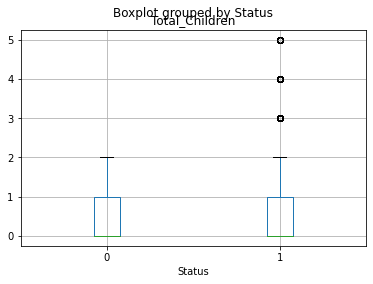

In [ ]:
#Outliers across target values

df.boxplot(column="Total_Children", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


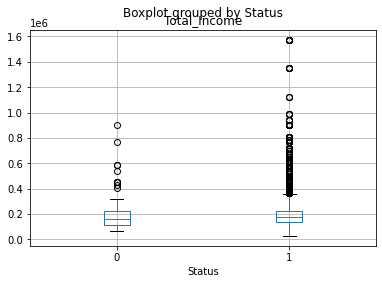

In [ ]:
df.boxplot(column="Total_Income", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


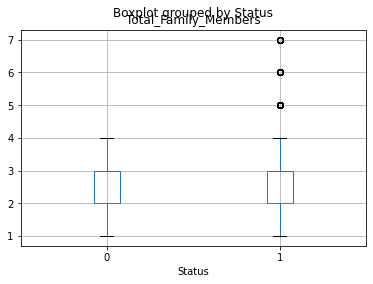

In [ ]:
df.boxplot(column="Total_Family_Members", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


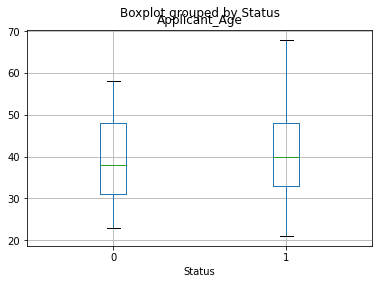

In [ ]:
df.boxplot(column="Applicant_Age", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


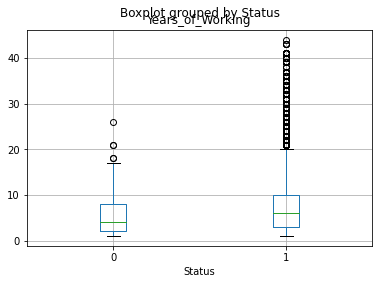

In [ ]:
df.boxplot(column="Years_of_Working", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


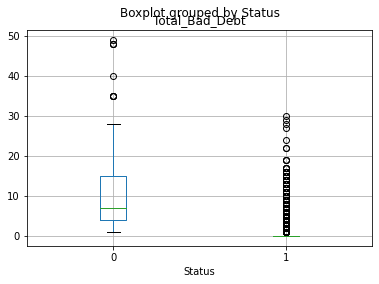

In [ ]:
df.boxplot(column="Total_Bad_Debt", by="Status")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


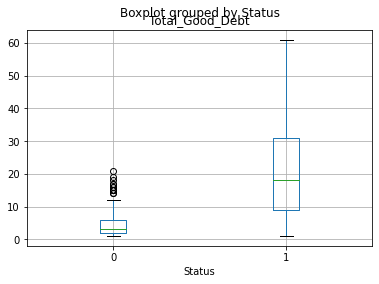

In [ ]:
df.boxplot(column="Total_Good_Debt", by="Status")

In [ ]:
#Categorical Variables - Bar Charts
#Mode in row 0.

df.mode()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,F,0.0,1.0,0.0,135000.0,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0.0,0.0,0.0,Laborers ...,2.0,38.0,2.0,0.0,7.0,1.0
1,5008808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5008809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5008810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5008811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25124,5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25125,5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25126,5150485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Looking for uniqueness and rare events.

df.describe(include="category")

,Applicant_Gender,Income_Type,Education_Type,Family_Status,Housing_Type,Job_Title
count,25128,25128,25128,25128,25128,25128
unique,2,5,5,5,6,18
top,F,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,Laborers ...
freq,15627,15616,16802,17507,22096,6211


In [ ]:
print(df["Income_Type"].unique())

['Working                                      ..., 'Commercial associate                         ..., 'State servant                                ..., 'Student                                      ..., 'Pensioner                                    ...]
Categories (5, object): ['Commercial associate                         ..., 'Pensioner                                    ...,
                         'State servant                                ..., 'Student                                      ...,
                         'Working                                      ...]


In [ ]:
print(df["Education_Type"].unique())

['Secondary / secondary special                ..., 'Higher education                             ..., 'Incomplete higher                            ..., 'Lower secondary                              ..., 'Academic degree                              ...]
Categories (5, object): ['Academic degree                              ..., 'Higher education                             ...,
                         'Incomplete higher                            ..., 'Lower secondary                              ...,
                         'Secondary / secondary special                ...]


In [ ]:
print(df["Family_Status"].unique())

['Married                                      ..., 'Single / not married                         ..., 'Civil marriage                               ..., 'Separated                                    ..., 'Widow                                        ...]
Categories (5, object): ['Civil marriage                               ..., 'Married                                      ...,
                         'Separated                                    ..., 'Single / not married                         ...,
                         'Widow                                        ...]


In [ ]:
print(df["Housing_Type"].unique())

['House / apartment                            ..., 'Rented apartment                             ..., 'Municipal apartment                          ..., 'With parents                                 ..., 'Co-op apartment                              ..., 'Office apartment                             ...]
Categories (6, object): ['Co-op apartment                              ..., 'House / apartment                            ...,
                         'Municipal apartment                          ..., 'Office apartment                             ...,
                         'Rented apartment                             ..., 'With parents                                 ...]


In [ ]:
print(df["Job_Title"].unique())

['Security staff                               ..., 'Sales staff                                  ..., 'Accountants                                  ..., 'Laborers                                     ..., 'Managers                                     ..., ..., 'Secretaries                                  ..., 'Waiters/barmen staff                         ..., 'HR staff                                     ..., 'Realty agents                                ..., 'IT staff                                     ...]
Length: 18
Categories (18, object): ['Accountants                                  ..., 'Cleaning staff                               ...,
                          'Cooking staff                                ..., 'Core staff                                   ..., ...,
                          'Sales staff                                  ..., 'Secretaries                                  ...,
                          'Security staff                               ..., 'Waiter

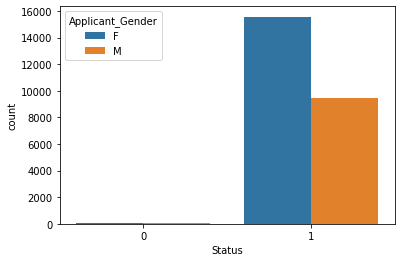

In [ ]:
#Bivariate for categorical variables: Since the data is notoriously unbalanced, the visualization of categories when the status is 0 is not clear.

sns.countplot(data=df, x="Status", hue="Applicant_Gender")

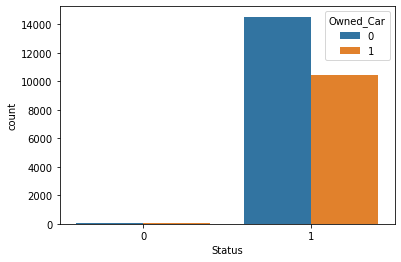

In [ ]:
sns.countplot(data=df, x="Status", hue="Owned_Car")

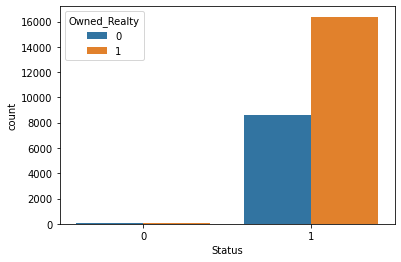

In [ ]:
sns.countplot(data=df, x="Status", hue="Owned_Realty")

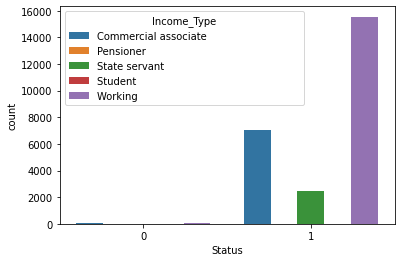

In [ ]:
sns.countplot(data=df, x="Status", hue="Income_Type")

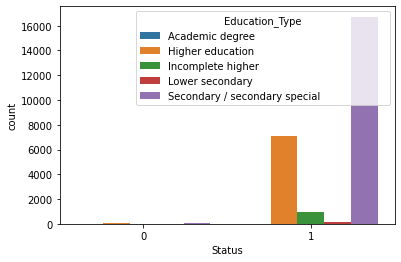

In [ ]:
sns.countplot(data=df, x="Status", hue="Education_Type")

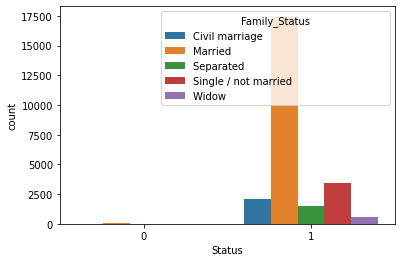

In [ ]:
sns.countplot(data=df, x="Status", hue="Family_Status")

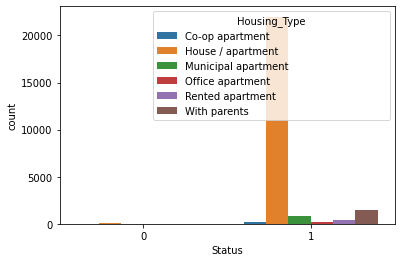

In [ ]:
sns.countplot(data=df, x="Status", hue="Housing_Type")

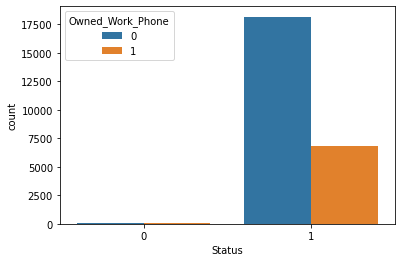

In [ ]:
sns.countplot(data=df, x="Status", hue="Owned_Work_Phone")

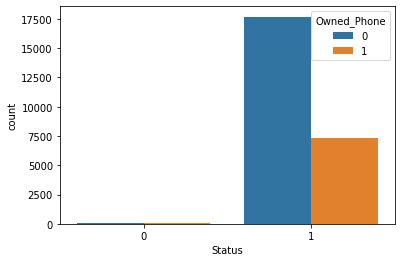

In [ ]:
sns.countplot(data=df, x="Status", hue="Owned_Phone")

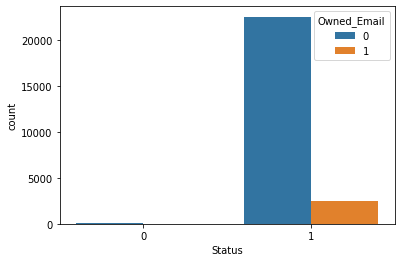

In [ ]:
sns.countplot(data=df, x="Status", hue="Owned_Email")

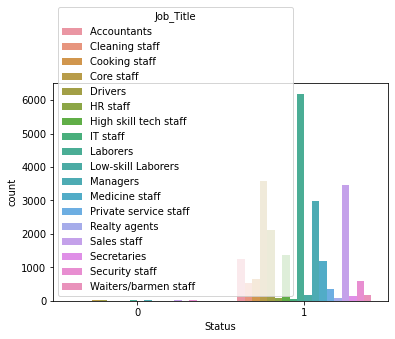

In [ ]:
sns.countplot(data=df, x="Status", hue="Job_Title")

## **DATA PREPARATION**

In [5]:
# Drop ID, Owned_Mobile_Phone (100% 1), Total_Family_Members (correlation 0.9 with Total_Children & lower correlation with target), Owned_Email (90% 0s), Bad_Debt (88%)

df = df.drop(columns=["Applicant_ID", "Owned_Mobile_Phone", "Total_Family_Members", "Owned_Email", "Total_Bad_Debt"])

In [6]:
# Handling Outliers

for x in ["Total_Children"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

df.loc[df[x] < min,x] = np.nan
df.loc[df[x] > max,x] = np.nan

In [7]:
for x in ["Total_Income"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

df.loc[df[x] < min,x] = np.nan
df.loc[df[x] > max,x] = np.nan

In [8]:
for x in ["Years_of_Working"]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

df.loc[df[x] < min,x] = np.nan
df.loc[df[x] > max,x] = np.nan

In [9]:
df.isnull().sum()

Applicant_Gender       0
Owned_Car              0
Owned_Realty           0
Total_Children       387
Total_Income        1180
Income_Type            0
Education_Type         0
Family_Status          0
Housing_Type           0
Owned_Work_Phone       0
Owned_Phone            0
Job_Title              0
Applicant_Age          0
Years_of_Working    1420
Total_Good_Debt        0
Status                 0
dtype: int64

In [10]:
df = df.dropna(axis = 0)

In [11]:
df.isnull().sum()

Applicant_Gender    0
Owned_Car           0
Owned_Realty        0
Total_Children      0
Total_Income        0
Income_Type         0
Education_Type      0
Family_Status       0
Housing_Type        0
Owned_Work_Phone    0
Owned_Phone         0
Job_Title           0
Applicant_Age       0
Years_of_Working    0
Total_Good_Debt     0
Status              0
dtype: int64

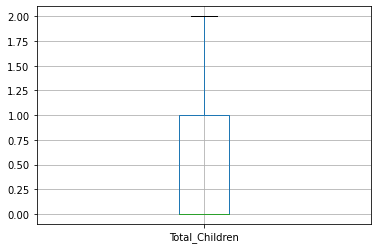

In [12]:
df.boxplot(column="Total_Children")

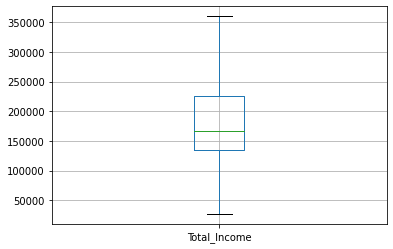

In [13]:
df.boxplot(column="Total_Income")

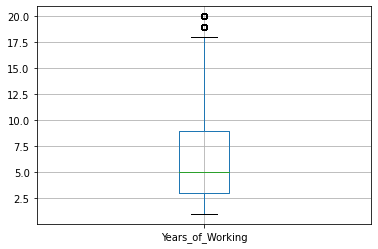

In [14]:
df.boxplot(column="Years_of_Working")

In [15]:
#Skewness improvement

df.skew(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Owned_Car            0.337474
Owned_Realty        -0.623819
Total_Children       1.092711
Total_Income         0.604917
Owned_Work_Phone     1.000345
Owned_Phone          0.933422
Applicant_Age        0.327120
Years_of_Working     0.932117
Total_Good_Debt      0.752681
Status             -14.299688
dtype: float64

In [16]:
# Convert categorical variables into dummies

df = pd.get_dummies(df)

In [17]:
print(df.shape)
print(df.columns)

(22197, 51)
Index(['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income',
       'Owned_Work_Phone', 'Owned_Phone', 'Applicant_Age', 'Years_of_Working',
       'Total_Good_Debt', 'Status', 'Applicant_Gender_F      ',
       'Applicant_Gender_M      ',
       'Income_Type_Commercial associate                              ',
       'Income_Type_Pensioner                                         ',
       'Income_Type_State servant                                     ',
       'Income_Type_Student                                           ',
       'Income_Type_Working                                           ',
       'Education_Type_Academic degree                                   ',
       'Education_Type_Higher education                                  ',
       'Education_Type_Incomplete higher                                 ',
       'Education_Type_Lower secondary                                   ',
       'Education_Type_Secondary / secondary special                   

In [18]:
# Split the dataset into training and validation data 
X=df.drop(columns=["Status"])
y=df["Status"]
train_X, valid_X, train_y, valid_y = train_test_split(X, y,  test_size=0.4, random_state=1)

In [19]:
# Standardization of the data 

ss = StandardScaler() 
ss.fit(train_X) 
train_X = ss.transform(train_X) 
valid_X = ss.transform(valid_X)

In [20]:
train_X

array([[-0.8451325 ,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [ 1.18324642,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [-0.8451325 ,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       ...,
       [-0.8451325 ,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [-0.8451325 , -1.34989188, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [-0.8451325 , -1.34989188, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462]])

In [21]:
valid_X

array([[-0.8451325 ,  0.74080007,  0.75304342, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [ 1.18324642, -1.34989188,  0.75304342, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [-0.8451325 , -1.34989188, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       ...,
       [-0.8451325 ,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [ 1.18324642,  0.74080007, -0.69581995, ..., -0.07966986,
        -0.16258983, -0.08828462],
       [-0.8451325 ,  0.74080007,  0.75304342, ..., -0.07966986,
        -0.16258983, -0.08828462]])

In [22]:
#SMOTE

sm = SMOTE(random_state=42) 
 
X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (22197, 50)
Shape of X after SMOTE: (44180, 50)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Status, dtype: float64

In [23]:
counter = Counter(y)
print(counter)
counter = Counter(y_sm)
print(counter)

Counter({1: 22090, 0: 107})
Counter({1: 22090, 0: 22090})


## **MODELING**

#Random Forest

In [24]:
train_X, valid_X, train_y, valid_y = train_test_split(X_sm, y_sm,  test_size=0.4, random_state=17)

In [25]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [26]:
importance= rf.feature_importances_
std=np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [27]:
imp= pd.DataFrame({'feature': train_X.columns, 'importance': importance, 'std':std})
print(imp.sort_values('importance', ascending=False).head())

                                              feature  importance       std
8                                     Total_Good_Debt    0.282459  0.111318
2                                      Total_Children    0.057040  0.048870
40  Job_Title_Laborers                            ...    0.055407  0.029046
3                                        Total_Income    0.050798  0.019152
9                            Applicant_Gender_F          0.045644  0.026092


Text(0.5, 1.0, 'Visualizing Important Features')

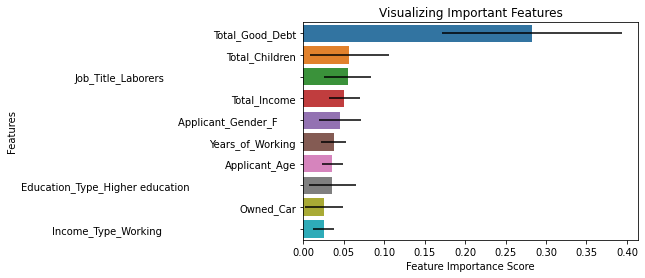

In [28]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) 
tf = pd.DataFrame({'feature': train_X.columns, 'importance': rf.feature_importances_, 'std': std}) 
tf = tf.sort_values('importance', ascending = False)
sns.barplot(x = tf['importance'][:10], y = tf['feature'][:10], xerr = tf['std'][:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [29]:
Accuracy_rf = accuracy_score(valid_y, rf.predict(valid_X))
print(Accuracy_rf)
Precision_rf = precision_score(valid_y, rf.predict(valid_X))
print(Precision_rf)
Recall_rf = recall_score(valid_y, rf.predict(valid_X))
print(Recall_rf)
F1Score_rf = f1_score(valid_y, rf.predict(valid_X))
print(F1Score_rf)

0.9976799456767769
0.9959165154264973
0.9994308480364257
0.9976705868984717


In [30]:
classificationSummary(train_y, rf.predict(train_X))

Confusion Matrix (Accuracy 0.9999)

       Prediction
Actual     0     1
     0 13200     3
     1     0 13305


In [31]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9977)

       Prediction
Actual    0    1
     0 8851   36
     1    5 8780


In [32]:
scores = cross_val_score(rf, train_X, train_y, scoring='roc_auc', n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 1.000


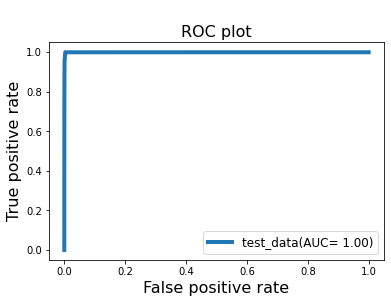

In [45]:
y_pred_proba = rf.predict_proba(valid_X)[::,1]

fpr, tpr, _ = metrics.roc_curve(valid_y, y_pred_proba)

auc = metrics.roc_auc_score(valid_y, y_pred_proba)
roc_auc_rf = auc

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4)
plt.legend(prop={'size':12},loc='best')
plt.title('\nROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

# CV/GridSearch for Random Forest

In [51]:
param_grid = {
    'max_depth' : [5, 15, 25, 30],
    'min_samples_split' : [5, 15, 30, 45],
    'min_impurity_decrease' : [0.05, 0.01, 0.001, 0.0001],
    "n_estimators" : [200, 400, 600, 800]
}

In [70]:
gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)

In [71]:
gridsearch.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 15, 25, 30],
                         'min_impurity_decrease': [0.05, 0.01, 0.001, 0.0001],
                         'min_samples_split': [5, 15, 30, 45],
                         'n_estimators': [200, 400, 600, 800]})

In [72]:
gridsearch.best_score_

0.9980006035913687

In [73]:
gridsearch.best_params_

{'max_depth': 30,
 'min_impurity_decrease': 0.0001,
 'min_samples_split': 5,
 'n_estimators': 200}

In [74]:
rf_gs=gridsearch.best_estimator_
rf_gs

RandomForestClassifier(max_depth=30, min_impurity_decrease=0.0001,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [75]:
Accuracy_rf_gs = accuracy_score(valid_y, rf_gs.predict(valid_X))
print(Accuracy_rf_gs)
Precision_rf_gs = precision_score(valid_y, rf_gs.predict(valid_X))
print(Precision_rf_gs)
Recall_rf_gs = recall_score(valid_y, rf_gs.predict(valid_X))
print(Recall_rf_gs)
F1Score_rf_gs = f1_score(valid_y, rf_gs.predict(valid_X))
print(F1Score_rf_gs)

0.9965482118605704
0.9941096511101042
0.9989755264655663
0.9965366490660308


In [76]:
classificationSummary(train_y, rf_gs.predict(train_X))

Confusion Matrix (Accuracy 0.9983)

       Prediction
Actual     0     1
     0 13166    37
     1     9 13296


In [77]:
classificationSummary(valid_y, rf_gs.predict(valid_X))

Confusion Matrix (Accuracy 0.9965)

       Prediction
Actual    0    1
     0 8835   52
     1    9 8776


In [78]:
scores = cross_val_score(rf_gs, train_X, train_y, scoring='roc_auc', n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 1.000


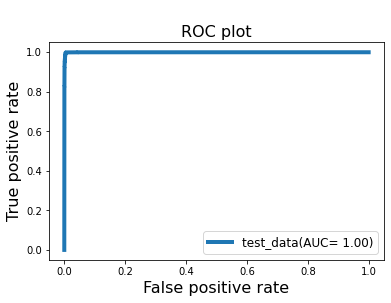

In [79]:
y_pred_proba = rf_gs.predict_proba(valid_X)[::,1]

fpr, tpr, _ = metrics.roc_curve(valid_y, y_pred_proba)

auc = metrics.roc_auc_score(valid_y, y_pred_proba)
roc_auc_rf_gs = auc

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4)
plt.legend(prop={'size':12},loc='best')
plt.title('\nROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

#Logistic Regression

In [38]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [52]:
logit_reg.intercept_

array([-0.06293599])

In [53]:
logit_reg.coef_

array([[ 9.03559863e-02,  1.23859486e-01, -6.42439892e-03,
         3.58837374e-07,  6.71784050e-02,  9.53809622e-02,
        -8.24635693e-02,  2.76037219e-02,  2.99955781e-01,
         1.67119350e-01,  5.64137919e-03,  8.42213265e-02,
         1.49123504e-06,  4.96370358e-02,  4.86368142e-05,
         1.16401769e-01,  1.73329563e-04,  9.79842132e-02,
         1.55377739e-02,  3.38129672e-03,  1.17209035e-01,
         5.25308283e-02,  4.62060576e-02,  3.30515982e-02,
         5.28926891e-02,  1.48249885e-02,  3.72524804e-03,
         1.06227911e-01,  1.56644718e-02, -4.78747025e-03,
         1.05789108e-02,  2.34085254e-02,  2.80834921e-02,
         1.74582893e-02,  1.46894006e-02,  6.40738235e-02,
         3.89504836e-02,  2.82387438e-03,  2.96225391e-02,
        -2.10979320e-02,  1.09484056e-01,  4.02507474e-03,
         4.51898158e-02,  1.29119746e-02,  8.97648452e-03,
         2.47728544e-03,  7.72326549e-02,  3.04017801e-03,
        -5.33579355e-03,  6.76970360e-03]])

In [ ]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                                                            coef
Owned_Car                                           9.035599e-02
Owned_Realty                                        1.238595e-01
Total_Children                                     -6.424399e-03
Total_Income                                        3.588374e-07
Owned_Work_Phone                                    6.717840e-02
Owned_Phone                                         9.538096e-02
Applicant_Age                                      -8.246357e-02
Years_of_Working                                    2.760372e-02
Total_Good_Debt                                     2.999558e-01
Applicant_Gender_F                                  1.671194e-01
Applicant_Gender_M                                  5.641379e-03
Income_Type_Commercial associate               ...  8.422133e-02
Income_Type_Pensioner                          ...  1.491235e-06
Income_Type_State servant                      ...  4.963704e-02
Income_Type_Student      

In [54]:
logit_reg_prob = logit_reg.predict_proba(valid_X)
logit_reg_prob

array([[0.00519336, 0.99480664],
       [0.92970607, 0.07029393],
       [0.72985203, 0.27014797],
       ...,
       [0.57301071, 0.42698929],
       [0.87973316, 0.12026684],
       [0.29636304, 0.70363696]])

In [55]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_pred

array([1, 0, 0, ..., 0, 0, 1])

In [56]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
4043,1,0.005193,0.994807,1
25399,0,0.929706,0.070294,0
22877,0,0.729852,0.270148,0
37141,0,0.278256,0.721744,1
43162,0,0.764932,0.235068,0
...,...,...,...,...
29245,0,0.872658,0.127342,0
18116,1,0.012071,0.987929,1
32930,0,0.573011,0.426989,0
26641,0,0.879733,0.120267,0


In [57]:
Accuracy_logit_reg = accuracy_score(valid_y, logit_reg.predict(valid_X))
print(Accuracy_logit_reg)
Precision_logit_reg = precision_score(valid_y, logit_reg.predict(valid_X))
print(Precision_logit_reg)
Recall_logit_reg = recall_score(valid_y, logit_reg.predict(valid_X))
print(Recall_logit_reg)
F1Score_logit_reg = f1_score(valid_y, logit_reg.predict(valid_X))
print(F1Score_logit_reg)

0.8280330466274333
0.8644089294774226
0.7757541263517359
0.8176855240266363


In [58]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8280)

       Prediction
Actual     0     1
     0 11555  1648
     1  2912 10393


In [59]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8280)

       Prediction
Actual    0    1
     0 7818 1069
     1 1970 6815


In [60]:
scores = cross_val_score(logit_reg, train_X, train_y, scoring='roc_auc', n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.916


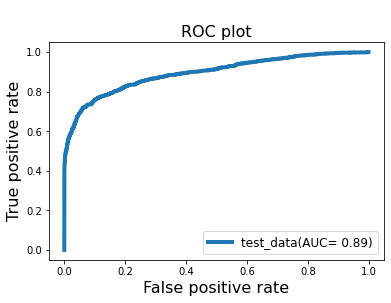

In [47]:
y_pred_proba = logit_reg.predict_proba(valid_X)[::,1]

fpr, tpr, _ = metrics.roc_curve(valid_y, y_pred_proba)

auc = metrics.roc_auc_score(valid_y, y_pred_proba)
roc_auc_logit_reg = auc

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4)
plt.legend(prop={'size':12},loc='best')
plt.title('\nROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

# Neural Network: Multi-layer Perceptron

In [40]:
clf = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=3,random_state=17)
clf.fit(train_X,train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=17,
              solver='lbfgs')

In [61]:
Accuracy_clf = accuracy_score(valid_y, clf.predict(valid_X))
print(Accuracy_clf)
Precision_clf = precision_score(valid_y, clf.predict(valid_X))
print(Precision_clf)
Recall_clf = recall_score(valid_y, clf.predict(valid_X))
print(Recall_clf)
F1Score_clf = f1_score(valid_y, clf.predict(valid_X))
print(F1Score_clf)

0.4971140787686736
0.4971140787686736
1.0
0.664096458404203


In [62]:
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 0.5019)

       Prediction
Actual     0     1
     0     0 13203
     1     0 13305


In [63]:
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.4971)

       Prediction
Actual    0    1
     0    0 8887
     1    0 8785


In [64]:
scores = cross_val_score(clf, train_X, train_y, scoring='roc_auc', n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.500


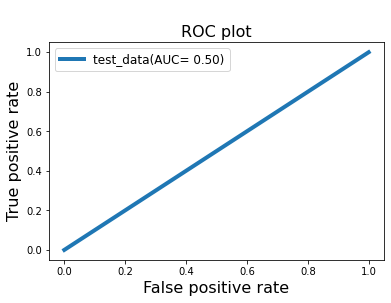

In [48]:
y_pred_proba = clf.predict_proba(valid_X)[::,1]

fpr, tpr, _ = metrics.roc_curve(valid_y, y_pred_proba)

auc = metrics.roc_auc_score(valid_y, y_pred_proba)
roc_auc_clf = auc

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4)
plt.legend(prop={'size':12},loc='best')
plt.title('\nROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

# Gradient Boost Classifier

In [42]:
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(train_X,train_y)

GradientBoostingClassifier()

In [65]:
Accuracy_gbc = accuracy_score(valid_y, gbc.predict(valid_X))
print(Accuracy_gbc)
Precision_gbc = precision_score(valid_y, gbc.predict(valid_X))
print(Precision_gbc)
Recall_gbc = recall_score(valid_y, gbc.predict(valid_X))
print(Recall_gbc)
F1Score_gbc = f1_score(valid_y, gbc.predict(valid_X))
print(F1Score_gbc)

0.9839293798098687
0.9840564855938959
0.9836084234490609
0.9838324035067745


In [66]:
classificationSummary(train_y, gbc.predict(train_X))

Confusion Matrix (Accuracy 0.9871)

       Prediction
Actual     0     1
     0 13042   161
     1   181 13124


In [67]:
classificationSummary(valid_y, gbc.predict(valid_X))

Confusion Matrix (Accuracy 0.9839)

       Prediction
Actual    0    1
     0 8747  140
     1  144 8641


In [68]:
scores = cross_val_score(gbc, train_X, train_y, scoring='roc_auc', n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.999


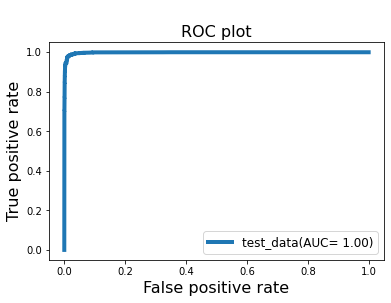

In [49]:
y_pred_proba = gbc.predict_proba(valid_X)[::,1]

fpr, tpr, _ = metrics.roc_curve(valid_y, y_pred_proba)

auc = metrics.roc_auc_score(valid_y, y_pred_proba)
roc_auc_gbc = auc

plt.plot(fpr,tpr,label="test_data(AUC= %0.2f)" % auc, linewidth = 4)
plt.legend(prop={'size':12},loc='best')
plt.title('\nROC plot',fontsize = 16)
plt.xlabel('False positive rate', fontsize = 16)
plt.ylabel('True positive rate', fontsize = 16)
plt.show()

#Model Comparisson

In [46]:
column_labels = ["Model", "Accuracy", "Recall", "Precision", "F1-Score", "ROC"]

In [80]:
df_1 = pd.DataFrame([['Random_Forest', Accuracy_rf, Recall_rf, Precision_rf, F1Score_rf, roc_auc_rf]], columns = column_labels)
df_2 = pd.DataFrame([['Grid_Search_Random_Forest', Accuracy_rf_gs, Recall_rf_gs, Precision_rf_gs, F1Score_rf_gs, roc_auc_rf_gs]], columns = column_labels)
df_3 = pd.DataFrame([['Logistic_Regression', Accuracy_logit_reg, Recall_logit_reg, Precision_logit_reg, F1Score_logit_reg, roc_auc_logit_reg]], columns = column_labels)
df_4 = pd.DataFrame([['Neural_Network', Accuracy_clf, Recall_clf, Precision_clf, F1Score_clf, roc_auc_clf]], columns = column_labels)
df_5 = pd.DataFrame([['Gradient_Boost_Classifier', Accuracy_gbc, Recall_gbc, Precision_gbc, F1Score_gbc, roc_auc_gbc]], columns = column_labels)

In [81]:
mc = pd.concat([df_1, df_2, df_3, df_4, df_5])
mc

,Model,Accuracy,Recall,Precision,F1-Score,ROC
0,Random_Forest,0.997680,0.999431,0.995917,0.997671,0.999577
0,Grid_Search_Random_Forest,0.996548,0.998976,0.994110,0.996537,0.999601
0,Logistic_Regression,0.828033,0.775754,0.864409,0.817686,0.894708
0,Neural_Network,0.497114,1.000000,0.497114,0.664096,0.500000
0,Gradient_Boost_Classifier,0.983929,0.983608,0.984056,0.983832,0.998527
